In [14]:
import stlearn as st
from pathlib import Path
import pandas as pd
import sys

In [30]:
file = Path("../stimage").resolve()
parent= file.parent
sys.path.append(str(parent))

In [32]:
from stimage.utils import gene_plot, Read10X, ReadOldST

In [37]:
BASE_PATH = Path("/scratch/imb/Xiao/unet")

In [138]:
SAMPLE = "Sample1"
Sample1 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample1_features = pd.read_csv(BASE_PATH / ("features/train/"+SAMPLE+".csv"), index_col=0)
Sample1.obs["f_index"] = Sample1.obs["imagerow"].astype(str) + "-" + Sample1.obs["imagecol"].astype(str)
Sample1_features = Sample1_features.reindex(Sample1.obs["f_index"])
Sample1_features.index = Sample1.obs_names
Sample1.obsm["features"] = Sample1_features

Added tissue image to the object!


In [139]:
SAMPLE = "Sample2"
Sample2 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample2_features = pd.read_csv(BASE_PATH / ("features/train/"+SAMPLE+".csv"), index_col=0)
Sample2.obs["f_index"] = Sample2.obs["imagerow"].astype(str) + "-" + Sample2.obs["imagecol"].astype(str)
Sample2_features = Sample2_features.reindex(Sample2.obs["f_index"])
Sample2_features.index = Sample2.obs_names
Sample2.obsm["features"] = Sample2_features

Added tissue image to the object!


In [140]:
SAMPLE = "Sample3"
Sample3 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample3_features = pd.read_csv(BASE_PATH / ("features/train/"+SAMPLE+".csv"), index_col=0)
Sample3.obs["f_index"] = Sample3.obs["imagerow"].astype(str) + "-" + Sample3.obs["imagecol"].astype(str)
Sample3_features = Sample3_features.reindex(Sample3.obs["f_index"])
Sample3_features.index = Sample3.obs_names
Sample3.obsm["features"] = Sample3_features

Added tissue image to the object!


In [141]:
SAMPLE = "Sample4"
Sample4 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample4_features = pd.read_csv(BASE_PATH / ("features/valid/"+SAMPLE+".csv"), index_col=0)
Sample4.obs["f_index"] = Sample4.obs["imagerow"].astype(str) + "-" + Sample4.obs["imagecol"].astype(str)
Sample4_features = Sample4_features.reindex(Sample4.obs["f_index"])
Sample4_features.index = Sample4.obs_names
Sample4.obsm["features"] = Sample4_features

Added tissue image to the object!


In [142]:
SAMPLE = "Sample5"
Sample5 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample5_features = pd.read_csv(BASE_PATH / ("features/test/"+SAMPLE+".csv"), index_col=0)
Sample5.obs["f_index"] = Sample5.obs["imagerow"].astype(str) + "-" + Sample5.obs["imagecol"].astype(str)
Sample5_features = Sample5_features.reindex(Sample5.obs["f_index"])
Sample5_features.index = Sample5.obs_names
Sample5.obsm["features"] = Sample5_features

Added tissue image to the object!


In [143]:
SAMPLE = "Sample6"
Sample6 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample6_features = pd.read_csv(BASE_PATH / ("features/test/"+SAMPLE+".csv"), index_col=0)
Sample6.obs["f_index"] = Sample6.obs["imagerow"].astype(str) + "-" + Sample6.obs["imagecol"].astype(str)
Sample6_features = Sample6_features.reindex(Sample6.obs["f_index"])
Sample6_features.index = Sample6.obs_names
Sample6.obsm["features"] = Sample6_features

Added tissue image to the object!


In [144]:
# Plp1 Aqp4 ERMN Apold1 Ccl4 Reln Pdgfra Dsp
gene_list=["ENSMUSG00000031425", "ENSMUSG00000024411", "ENSMUSG00000026830", 
           "ENSMUSG00000090698", "ENSMUSG00000018930", "ENSMUSG00000042453",
           "ENSMUSG00000029231", "ENSMUSG00000054889"]

In [159]:
gene = gene_list[0]

In [145]:
for adata in [
    Sample1,
    Sample2,
    Sample3,
    Sample4,
    Sample5,
    Sample6,
]:
#     count_df = adata.to_df()
#     count_df[count_df <=1] = 0
#     count_df[count_df >1] = 1
#     adata.X = count_df
#     adata[:,gene_list]
    st.pp.filter_genes(adata,min_cells=1)
    st.pp.normalize_total(adata)
#     st.pp.log1p(adata)
#     st.pp.scale(adata)
    
    
    

Normalization step is finished in adata.X
Normalization step is finished in adata.X
Normalization step is finished in adata.X
Normalization step is finished in adata.X
Normalization step is finished in adata.X
Normalization step is finished in adata.X


In [146]:
training_dataset = Sample1.concatenate(
    [Sample2, Sample3],
    batch_key="library_id",
    uns_merge="unique",
    batch_categories=[
        k
        for d in [
            Sample1.uns["spatial"],
            Sample2.uns["spatial"],
            Sample3.uns["spatial"],
        ]
        for k in [list(d.keys())[0]]
    ],
)

In [147]:
valid_dataset = Sample4.copy()

In [148]:
test_dataset = Sample5.concatenate(
    [Sample6],
    batch_key="library_id",
    uns_merge="unique",
    batch_categories=[
        k
        for d in [
            Sample5.uns["spatial"],
            Sample6.uns["spatial"],
        ]
        for k in [list(d.keys())[0]]
    ],
)

In [149]:
All_dataset = Sample1.concatenate(
    [Sample2, Sample3, Sample4, Sample5, Sample6],
    batch_key="library_id",
    uns_merge="unique",
    batch_categories=[
        k
        for d in [
            Sample1.uns["spatial"],
            Sample2.uns["spatial"],
            Sample3.uns["spatial"],
            Sample4.uns["spatial"],
            Sample5.uns["spatial"],
            Sample6.uns["spatial"],
        ]
        for k in [list(d.keys())[0]]
    ],
)

In [160]:
train_X = training_dataset.obsm["features"]
train_Y = training_dataset[:,gene].to_df()

In [161]:
valid_X = valid_dataset.obsm["features"]
valid_Y = valid_dataset[:,gene].to_df()

In [162]:
test_X = test_dataset.obsm["features"]
test_Y = test_dataset[:,gene].to_df()

In [228]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Lambda, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
print(tf.__version__)

2.2.0


In [171]:
def negative_binomial_layer(x):
    """
    Lambda function for generating negative binomial parameters
    n and p from a Dense(2) output.
    Assumes tensorflow 2 backend.
    
    Usage
    -----
    outputs = Dense(2)(final_layer)
    distribution_outputs = Lambda(negative_binomial_layer)(outputs)
    
    Parameters
    ----------
    x : tf.Tensor
        output tensor of Dense layer
        
    Returns
    -------
    out_tensor : tf.Tensor
        
    """
    
    # Get the number of dimensions of the input
    num_dims = len(x.get_shape())
    
    # Separate the parameters
    n, p = tf.unstack(x, num=2, axis=-1)
    
    # Add one dimension to make the right shape
    n = tf.expand_dims(n, -1)
    p = tf.expand_dims(p, -1)
        
    # Apply a softplus to make positive
    n = tf.keras.activations.softplus(n)
    
    # Apply a sigmoid activation to bound between 0 and 1
    p = tf.keras.activations.sigmoid(p)

    # Join back together again
    out_tensor = tf.concat((n, p), axis=num_dims-1)

    return out_tensor

In [172]:
def negative_binomial_loss(y_true, y_pred):
    """
    Negative binomial loss function.
    Assumes tensorflow backend.
    
    Parameters
    ----------
    y_true : tf.Tensor
        Ground truth values of predicted variable.
    y_pred : tf.Tensor
        n and p values of predicted distribution.
        
    Returns
    -------
    nll : tf.Tensor
        Negative log likelihood.
    """

    # Separate the parameters
    n, p = tf.unstack(y_pred, num=2, axis=-1)
    
    # Add one dimension to make the right shape
    n = tf.expand_dims(n, -1)
    p = tf.expand_dims(p, -1)
    
    # Calculate the negative log likelihood
    nll = (
        tf.math.lgamma(n) 
        + tf.math.lgamma(y_true + 1)
        - tf.math.lgamma(n + y_true)
        - n * tf.math.log(p)
        - y_true * tf.math.log(1 - p)
    )                  

    return nll

In [250]:
def build_model():
    inputs = Input(shape=(2048,))
#     outputs = Dropout(0.5)(inputs)
#     outputs = Dense(512,)(inputs)
#     outputs = Dense(256, activation='relu')(outputs)
    outputs = Dense(2)(inputs)
    distribution_outputs = Lambda(negative_binomial_layer)(outputs)
    
    model = Model(inputs=inputs, outputs=distribution_outputs)

#     optimizer = tf.keras.optimizers.RMSprop(0.0001)
    optimizer = tf.keras.optimizers.Adam()

    model.compile(loss=negative_binomial_loss,
                optimizer=optimizer,
                metrics=[negative_binomial_loss])
    return model

In [251]:
model = build_model()

In [252]:
EPOCHS = 100

history = model.fit(
  train_X, train_Y, batch_size=100,
  epochs=EPOCHS, validation_data = (valid_X, valid_Y), validation_batch_size = 100)

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 10.4577 - negative_binomial_loss: 10.45 - ETA: 0s - loss: 8.3114 - negative_binomial_loss: 8.3114 - 0s 11ms/step - loss: 8.0148 - negative_binomial_loss: 8.0148 - val_loss: 5.6399 - val_negative_binomial_loss: 5.6399
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 6.0649 - negative_binomial_loss: 6.06 - 0s 6ms/step - loss: 5.2508 - negative_binomial_loss: 5.2508 - val_loss: 4.1140 - val_negative_binomial_loss: 4.1140
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 4.7007 - negative_binomial_loss: 4.70 - 0s 5ms/step - loss: 4.4392 - negative_binomial_loss: 4.4392 - val_loss: 3.6963 - val_negative_binomial_loss: 3.6963
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss: 4.3470 - negative_binomial_loss: 4.34 - 0s 6ms/step - loss: 4.2442 - negative_binomial_loss: 4.2442 - val_loss: 3.6545 - val_negative_binomial_loss: 3.6545
Epoch 5/100
20/20 [====================

Epoch 37/100
20/20 [==============================] - ETA: 0s - loss: 3.6112 - negative_binomial_loss: 3.61 - 0s 4ms/step - loss: 3.9829 - negative_binomial_loss: 3.9829 - val_loss: 3.7902 - val_negative_binomial_loss: 3.7902
Epoch 38/100
20/20 [==============================] - ETA: 0s - loss: 3.9512 - negative_binomial_loss: 3.95 - 0s 4ms/step - loss: 3.9025 - negative_binomial_loss: 3.9025 - val_loss: 3.5376 - val_negative_binomial_loss: 3.5376
Epoch 39/100
20/20 [==============================] - ETA: 0s - loss: 3.9963 - negative_binomial_loss: 3.99 - 0s 4ms/step - loss: 3.9072 - negative_binomial_loss: 3.9072 - val_loss: 3.9349 - val_negative_binomial_loss: 3.9349
Epoch 40/100
20/20 [==============================] - ETA: 0s - loss: 3.9916 - negative_binomial_loss: 3.99 - 0s 4ms/step - loss: 3.9414 - negative_binomial_loss: 3.9414 - val_loss: 3.7102 - val_negative_binomial_loss: 3.7102
Epoch 41/100
20/20 [==============================] - ETA: 0s - loss: 3.8480 - negative_binomial

20/20 [==============================] - ETA: 0s - loss: 4.1020 - negative_binomial_loss: 4.10 - 0s 4ms/step - loss: 3.8950 - negative_binomial_loss: 3.8950 - val_loss: 3.5597 - val_negative_binomial_loss: 3.5597
Epoch 74/100
20/20 [==============================] - ETA: 0s - loss: 4.0068 - negative_binomial_loss: 4.00 - 0s 4ms/step - loss: 3.8774 - negative_binomial_loss: 3.8774 - val_loss: 3.5216 - val_negative_binomial_loss: 3.5216
Epoch 75/100
20/20 [==============================] - ETA: 0s - loss: 3.6256 - negative_binomial_loss: 3.62 - 0s 4ms/step - loss: 3.9356 - negative_binomial_loss: 3.9356 - val_loss: 3.9535 - val_negative_binomial_loss: 3.9535
Epoch 76/100
20/20 [==============================] - ETA: 0s - loss: 3.9316 - negative_binomial_loss: 3.93 - 0s 4ms/step - loss: 3.8549 - negative_binomial_loss: 3.8549 - val_loss: 3.5486 - val_negative_binomial_loss: 3.5486
Epoch 77/100
20/20 [==============================] - ETA: 0s - loss: 3.8479 - negative_binomial_loss: 3.84 -

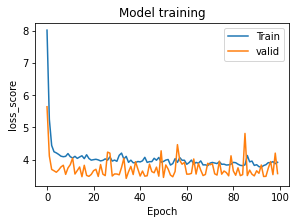

In [253]:
# Plot training & validation acc values
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model training')
plt.ylabel('loss_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper right')
plt.show()

In [254]:
test_predictions = model.predict(test_X)

In [255]:
test_predictions

array([[0.67622125, 0.08800715],
       [1.0516913 , 0.03940004],
       [0.8336345 , 0.08633435],
       ...,
       [0.84035903, 0.06455518],
       [0.6968914 , 0.06691252],
       [0.6381511 , 0.06370752]], dtype=float32)

In [261]:
from scipy.stats import nbinom
n = test_predictions[:,0]; p = test_predictions[:,1]
y_pred = nbinom.mean(n,p)
test_dataset.obsm["predicted_gene"] = y_pred

Populating the interactive namespace from numpy and matplotlib

ENSMUSG00000031425:


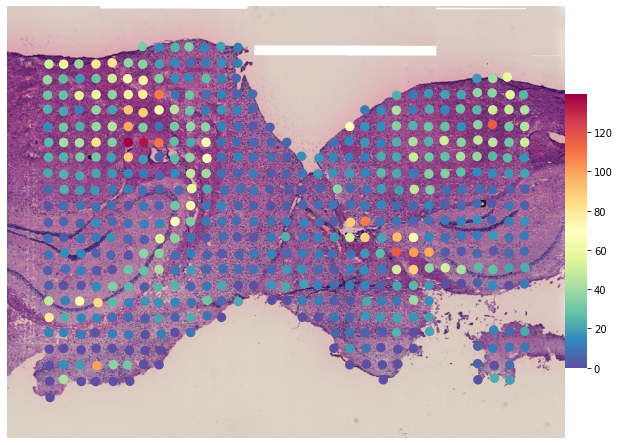


ENSMUSG00000031425:


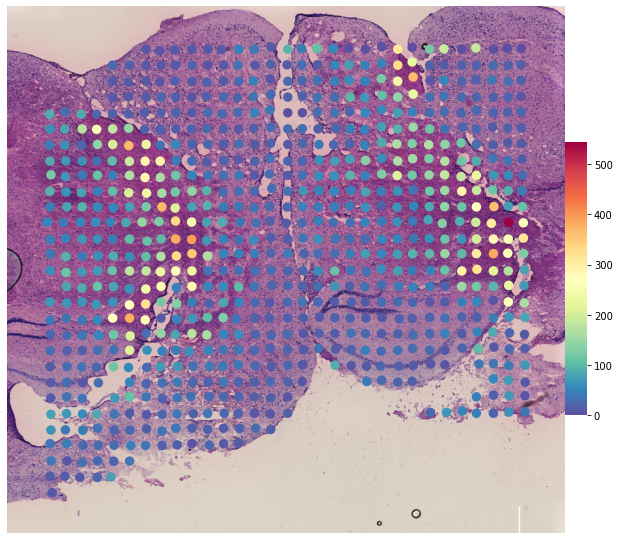

In [262]:
%pylab inline
figsize(10, 10)
for i, library in enumerate(
    ["Sample5", "Sample6"]
):
    ad = test_dataset[test_dataset.obs.library_id == library, :].copy()
    print('\n'+gene+':')
    gene_plot(ad, genes=gene, spot_size=90, library_id=library)

In [263]:
test_dataset_ = test_dataset[:,gene].copy()
test_dataset_.X = test_dataset_.obsm["predicted_gene"]

Populating the interactive namespace from numpy and matplotlib

ENSMUSG00000031425:


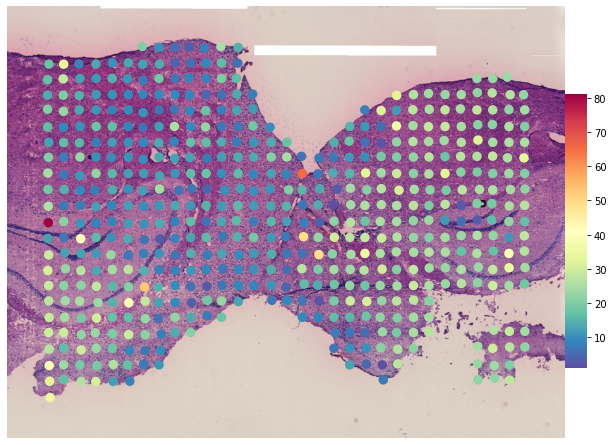


ENSMUSG00000031425:


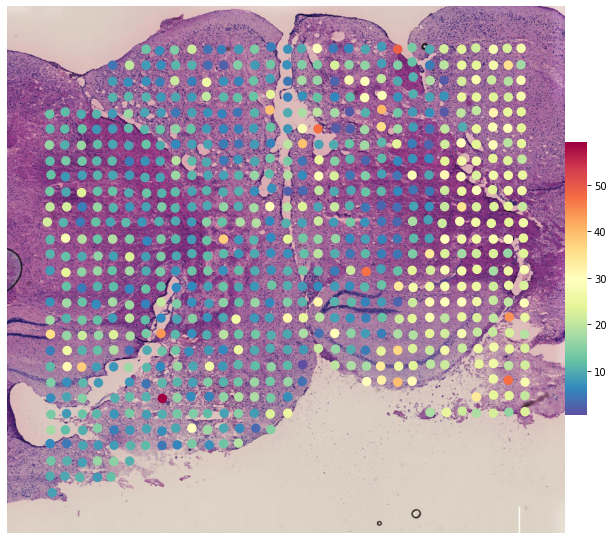

In [264]:
%pylab inline
figsize(10, 10)
for i, library in enumerate(
    ["Sample5", "Sample6"]
):
    ad = test_dataset_[test_dataset_.obs.library_id == library, :].copy()
    print('\n'+gene+':')
    gene_plot(ad, genes=gene, spot_size=90, library_id=library)